In [46]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
import splitfolders

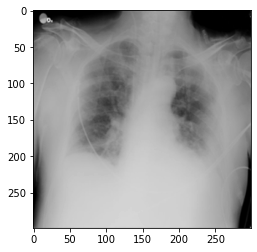

In [47]:
data_dir = "C:/Users/HH/Downloads/DIP_Project/Dataset/COVID-19_Radiography_Dataset"

CATEGORIES = ["COVID", "Normal", "Viral Pneumonia"]

for category in CATEGORIES:  # do COVID, Normal and Viral Pneumonia
    path = os.path.join(data_dir,category)  # create path to COVID, Normal and Viral Pneumonia
    for img in os.listdir(path):  # iterate over each image COVID, Normal and Viral Pneumonia
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!"

In [48]:
print(img_array)

[[185  40   0 ...   0  24 131]
 [ 75  14   0 ...   0   8  42]
 [ 11   2   0 ...   1   3  12]
 ...
 [ 78  62  68 ...   3  13  27]
 [104  74  75 ...   1  23  83]
 [156  90  78 ...   1  45 167]]


In [49]:
print(img_array.shape)

(299, 299)


In [50]:
type(img_array)

numpy.ndarray

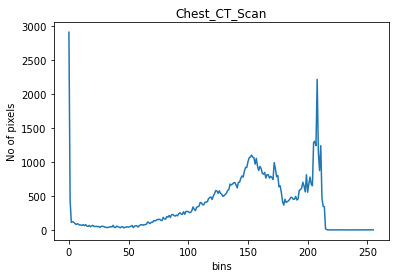

In [51]:
sample_img = cv2.imread("C:/Users/HH/Downloads/DIP_Project/Dataset/COVID-19_Radiography_Dataset/COVID/COVID-1.png", 0)
hist=cv2.calcHist([sample_img],[0],None,[256],[0,256])
plt.title("Chest_CT_Scan")
plt.xlabel('bins')
plt.ylabel("No of pixels")
plt.plot(hist)
plt.show()

In [52]:
print(hist)

[[2.904e+03]
 [4.370e+02]
 [1.120e+02]
 [1.220e+02]
 [1.120e+02]
 [9.400e+01]
 [8.000e+01]
 [9.100e+01]
 [8.400e+01]
 [7.100e+01]
 [7.200e+01]
 [6.600e+01]
 [7.800e+01]
 [6.200e+01]
 [7.700e+01]
 [5.800e+01]
 [5.300e+01]
 [6.600e+01]
 [4.700e+01]
 [5.900e+01]
 [6.700e+01]
 [5.100e+01]
 [5.000e+01]
 [5.400e+01]
 [4.600e+01]
 [5.100e+01]
 [3.500e+01]
 [5.200e+01]
 [5.400e+01]
 [5.000e+01]
 [4.100e+01]
 [4.100e+01]
 [3.300e+01]
 [3.900e+01]
 [4.000e+01]
 [4.900e+01]
 [4.300e+01]
 [6.700e+01]
 [3.800e+01]
 [3.500e+01]
 [5.600e+01]
 [4.700e+01]
 [4.200e+01]
 [3.100e+01]
 [4.600e+01]
 [4.700e+01]
 [3.000e+01]
 [4.000e+01]
 [4.300e+01]
 [4.600e+01]
 [4.100e+01]
 [4.700e+01]
 [5.500e+01]
 [6.500e+01]
 [3.400e+01]
 [5.600e+01]
 [6.200e+01]
 [6.000e+01]
 [4.200e+01]
 [6.200e+01]
 [7.500e+01]
 [7.800e+01]
 [6.900e+01]
 [7.700e+01]
 [7.700e+01]
 [8.600e+01]
 [1.170e+02]
 [1.040e+02]
 [9.300e+01]
 [1.130e+02]
 [1.100e+02]
 [1.360e+02]
 [1.320e+02]
 [1.390e+02]
 [1.540e+02]
 [1.520e+02]
 [1.570e+02]

In [58]:
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [59]:
img_height, img_width = 229, 229
batch_size = 32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split = 0.2,
  subset = 'training',
  seed = 123,
  label_mode = 'categorical',
  image_size = (img_height, img_width),
  batch_size = batch_size)

Found 15152 files belonging to 3 classes.
Using 12122 files for training.


In [60]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split = 0.2,
  subset = 'validation',
  seed = 123,
  label_mode = 'categorical',
  image_size = (img_height, img_width),
  batch_size = batch_size)

Found 15152 files belonging to 3 classes.
Using 3030 files for validation.


In [61]:
class_names = train_ds.class_names
print(class_names)

['COVID', 'Normal', 'Viral Pneumonia']


In [62]:
resnet_model = Sequential()

pretrained_model = tf.keras.applications.ResNet50(include_top = False,
                    input_shape = (299, 299, 3),
                    pooling = 'avg', classes = 3,
                    weights = 'imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False
        
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(3, activation = 'softmax'))

In [63]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 1539      
Total params: 24,638,339
Trainable params: 1,050,627
Non-trainable params: 23,587,712
_________________________________________________________________


In [64]:
resnet_model.compile(optimizer=Adam(lr = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
epochs = 10
history = resnet_model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/10
379/379 [==============================] - 672s 2s/step - loss: 0.2717 - accuracy: 0.8980 - val_loss: 0.1565 - val_accuracy: 0.9380
Epoch 2/10
379/379 [==============================] - 724s 2s/step - loss: 0.1491 - accuracy: 0.9460 - val_loss: 0.1272 - val_accuracy: 0.9508
Epoch 3/10
379/379 [==============================] - 743s 2s/step - loss: 0.1080 - accuracy: 0.9602 - val_loss: 0.1245 - val_accuracy: 0.9561
Epoch 4/10
379/379 [==============================] - 722s 2s/step - loss: 0.0858 - accuracy: 0.9672 - val_loss: 0.1084 - val_accuracy: 0.9594
Epoch 5/10
232/379 [=================>............] - ETA: 3:44 - loss: 0.0821 - accuracy: 0.9666

In [15]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin = 0.4, ymax = 1)
plot.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

NameError: name 'history' is not defined

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plot.grid()
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

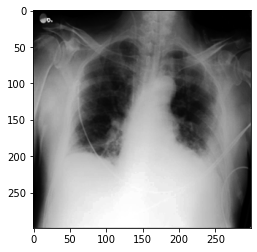

In [16]:
equ_img = cv2.equalizeHist(sample_img)
plt.imshow(equ_img, cmap='gray')

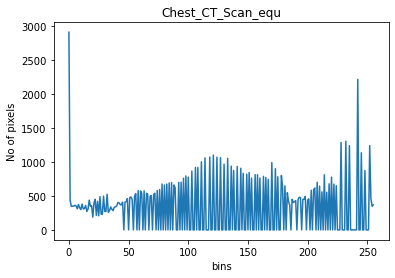

In [17]:
hist_equ=cv2.calcHist([equ_img],[0],None,[256],[0,256])
plt.title("Chest_CT_Scan_equ")
plt.xlabel('bins')
plt.ylabel("No of pixels")
plt.plot(hist_equ)
plt.show()

In [18]:
print(hist_equ)

[[2904.]
 [ 437.]
 [ 346.]
 [ 349.]
 [ 349.]
 [ 360.]
 [ 354.]
 [ 310.]
 [ 375.]
 [ 325.]
 [ 298.]
 [ 379.]
 [ 309.]
 [ 314.]
 [ 359.]
 [ 271.]
 [ 306.]
 [ 437.]
 [ 347.]
 [ 356.]
 [ 188.]
 [ 395.]
 [ 449.]
 [ 213.]
 [ 420.]
 [ 207.]
 [ 489.]
 [ 234.]
 [ 227.]
 [ 497.]
 [ 272.]
 [ 270.]
 [ 524.]
 [ 258.]
 [ 283.]
 [ 338.]
 [ 302.]
 [ 283.]
 [ 334.]
 [ 339.]
 [ 349.]
 [ 403.]
 [ 398.]
 [ 370.]
 [ 369.]
 [ 408.]
 [   0.]
 [ 407.]
 [ 415.]
 [ 460.]
 [   0.]
 [ 476.]
 [ 484.]
 [ 447.]
 [   0.]
 [ 499.]
 [ 533.]
 [   0.]
 [ 578.]
 [   0.]
 [ 572.]
 [ 538.]
 [   0.]
 [ 574.]
 [   0.]
 [ 538.]
 [ 525.]
 [   0.]
 [ 493.]
 [ 504.]
 [   0.]
 [ 521.]
 [ 539.]
 [   0.]
 [ 580.]
 [   0.]
 [ 593.]
 [   0.]
 [ 674.]
 [   0.]
 [ 660.]
 [   0.]
 [ 674.]
 [   0.]
 [ 691.]
 [   0.]
 [ 696.]
 [   0.]
 [ 661.]
 [ 617.]
 [   0.]
 [   0.]
 [ 699.]
 [   0.]
 [ 701.]
 [   0.]
 [ 759.]
 [   0.]
 [ 793.]
 [   0.]
 [ 776.]
 [   0.]
 [   0.]
 [ 864.]
 [   0.]
 [   0.]
 [ 918.]
 [   0.]
 [ 917.]
 [   0.]
 [   0.]
 

In [39]:

equalized_data_dir = "C:/Users/HH/Downloads/DIP_Project/Equalized_dataset"


def create_equalized_data():
    for category in CATEGORIES:  
        
        equalized_path = os.path.join(equalized_data_dir,category) 
        path = os.path.join(data_dir,category) 
        class_num = CATEGORIES.index(category)  

        for img in tqdm(os.listdir(path)): 
             normal_img = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
             equ_img = cv2.equalizeHist(normal_img)
             cv2.imwrite(os.path.join(equalized_path,img),equ_img) 
             
create_equalized_data()

100%|█████████████████████████████████████████████████████████████████████████████| 1345/1345 [00:04<00:00, 294.33it/s]


In [40]:
img_height, img_width = 229, 229
batch_size = 32
train_ds_equ = tf.keras.preprocessing.image_dataset_from_directory(
  equalized_data_dir,
  validation_split = 0.2,
  subset = 'training',
  seed = 123,
  label_mode = 'categorical',
  image_size = (img_height, img_width),
  batch_size = batch_size)

Found 15152 files belonging to 3 classes.
Using 12122 files for training.


In [41]:
val_ds_equ = tf.keras.preprocessing.image_dataset_from_directory(
  equalized_data_dir,
  validation_split = 0.2,
  subset = 'validation',
  seed = 123,
  label_mode = 'categorical',
  image_size = (img_height, img_width),
  batch_size = batch_size)

Found 15152 files belonging to 3 classes.
Using 3030 files for validation.


In [42]:
resnet_model_equ = Sequential()

pretrained_model = tf.keras.applications.ResNet50(include_top = False,
                    input_shape = (299, 299, 3),
                    pooling = 'avg', classes = 3,
                    weights = 'imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False
        
resnet_model_equ.add(pretrained_model)
resnet_model_equ.add(Flatten())
resnet_model_equ.add(Dense(512, activation = 'relu'))
resnet_model_equ.add(Dense(3, activation = 'softmax'))

In [43]:
resnet_model_equ.compile(optimizer=Adam(lr = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [44]:
epochs = 10
history = resnet_model_equ.fit(
    train_ds_equ,
    validation_data = val_ds_equ,
    epochs = epochs
)

Epoch 1/10
379/379 [==============================] - 651s 2s/step - loss: 0.3051 - accuracy: 0.8911 - val_loss: 0.1507 - val_accuracy: 0.9426
Epoch 2/10
379/379 [==============================] - 615s 2s/step - loss: 0.1513 - accuracy: 0.9442 - val_loss: 0.1345 - val_accuracy: 0.9479
Epoch 3/10
379/379 [==============================] - 614s 2s/step - loss: 0.1319 - accuracy: 0.9505 - val_loss: 0.1354 - val_accuracy: 0.9492
Epoch 4/10
379/379 [==============================] - 615s 2s/step - loss: 0.1068 - accuracy: 0.9606 - val_loss: 0.1473 - val_accuracy: 0.9436
Epoch 5/10
379/379 [==============================] - 619s 2s/step - loss: 0.0871 - accuracy: 0.9671 - val_loss: 0.1311 - val_accuracy: 0.9545
Epoch 6/10
379/379 [==============================] - 613s 2s/step - loss: 0.0831 - accuracy: 0.9688 - val_loss: 0.1099 - val_accuracy: 0.9644
Epoch 7/10
379/379 [==============================] - 605s 2s/step - loss: 0.0620 - accuracy: 0.9766 - val_loss: 0.1059 - val_accuracy: 0.9663